# Trend Changes

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv('/content/HospitalityEmployees.csv')

In [3]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

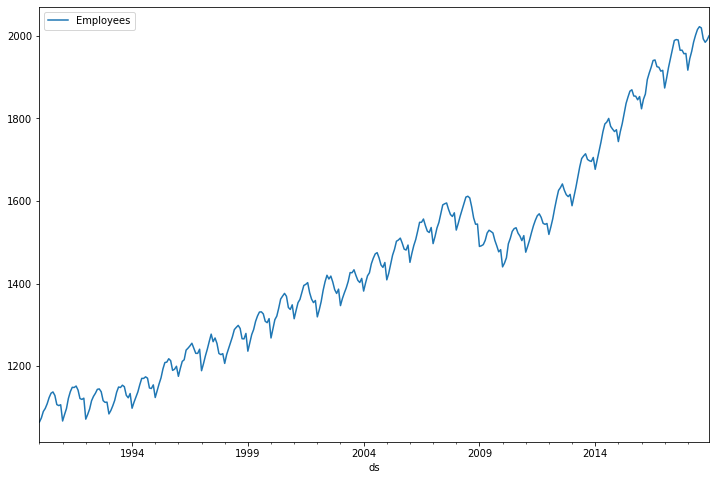

In [4]:
df.plot(x='ds',y='y',figsize=(12,8),label='Employees')

In [5]:
len(df)

348

In [6]:
len(df) - 12

336

In [7]:
train = df.iloc[:336]
test = df.iloc[336:]

In [8]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


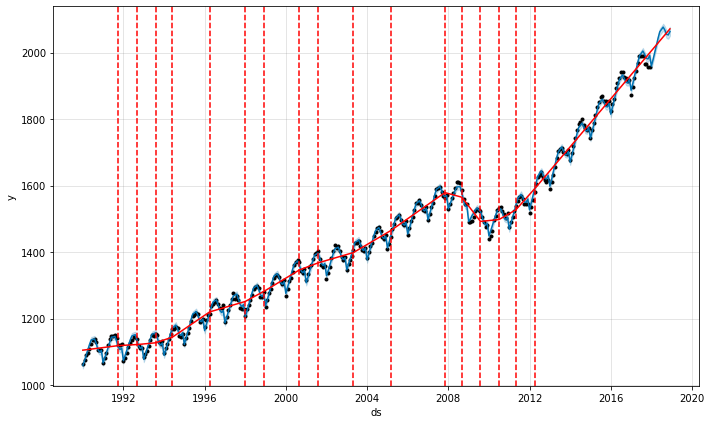

In [9]:
#Shows major points where trend line is seen to be changed
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Changing Seasonality

In [10]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [11]:
df = pd.read_csv('/content/airline_passengers.csv')

In [13]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


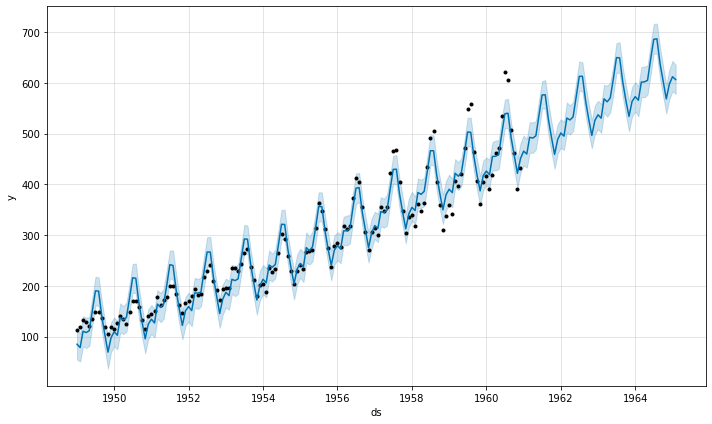

In [15]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

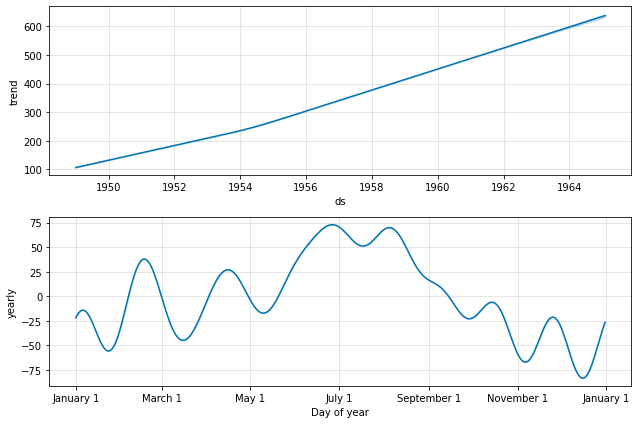

In [16]:
fig = m.plot_components(forecast)

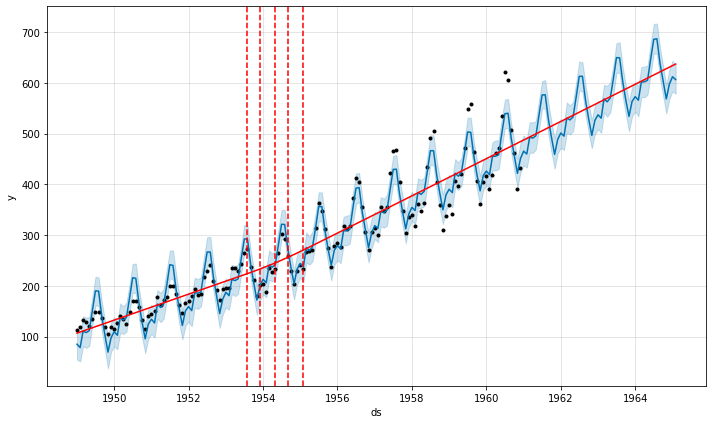

In [17]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Change to Multiplicative 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


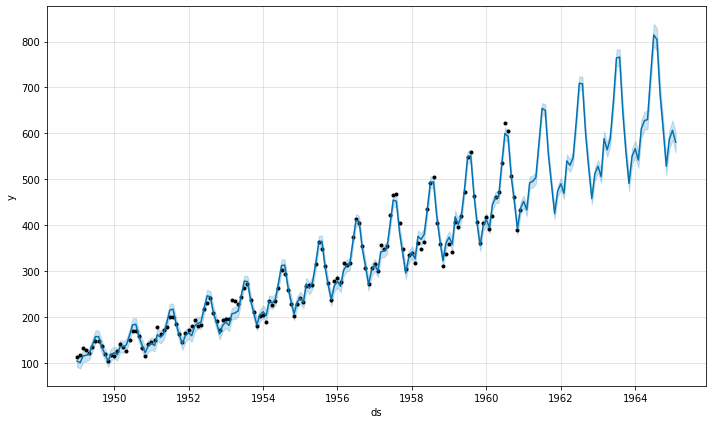

In [18]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

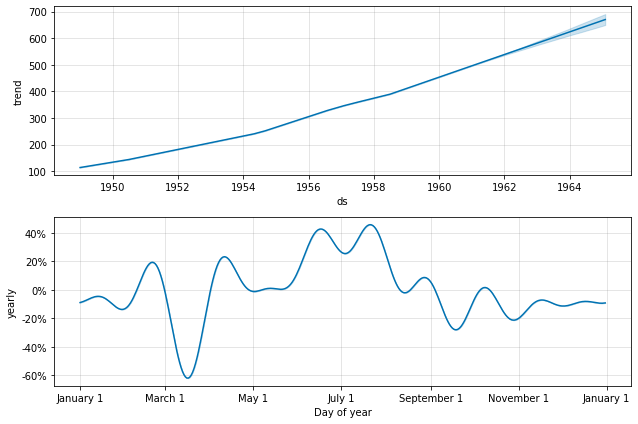

In [19]:
fig = m.plot_components(forecast)

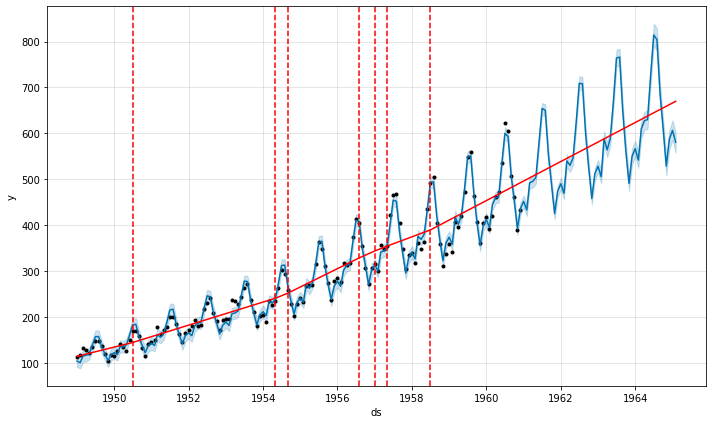

In [20]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

If u are confused, which is better mode (additive or multiplicative), create model for both and predict your test and see which one has low rmse